In [7]:
import pandas as pd

data = pd.read_excel('Data\Obesity_Dataset.xlsx')
data.head()

,Sex,Age,Height,Overweight_Obese_Family,Consumption_of_Fast_Food,Frequency_of_Consuming_Vegetables,Number_of_Main_Meals_Daily,Food_Intake_Between_Meals,Smoking,Liquid_Intake_Daily,Calculation_of_Calorie_Intake,Physical_Excercise,Schedule_Dedicated_to_Technology,Type_of_Transportation_Used,Class
0,2,18,155,2,2,3,1,3,2,1,2,3,3,4,2
1,2,18,158,2,2,3,1,1,2,1,2,1,3,3,2
2,2,18,159,2,2,2,1,3,2,3,2,2,3,4,2
3,2,18,162,2,2,2,2,2,2,2,2,1,3,4,2
4,2,18,165,2,1,2,1,3,2,1,2,3,3,2,2


In [8]:
data.describe()

,Sex,Age,Height,Overweight_Obese_Family,Consumption_of_Fast_Food,Frequency_of_Consuming_Vegetables,Number_of_Main_Meals_Daily,Food_Intake_Between_Meals,Smoking,Liquid_Intake_Daily,Calculation_of_Calorie_Intake,Physical_Excercise,Schedule_Dedicated_to_Technology,Type_of_Transportation_Used,Class
count,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.00000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000
mean,1.557764,33.115528,167.741615,1.834783,1.729193,2.063354,1.872050,2.395652,1.69441,2.108696,1.822360,3.265839,2.012422,2.667081,2.678882
std,0.496806,9.835076,7.979873,0.371492,0.444515,0.746043,0.638345,1.010501,0.46080,0.814710,0.382328,1.343035,0.697929,1.518388,0.815855
min,1.000000,18.000000,150.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,25.000000,161.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.00000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000
50%,2.000000,32.000000,168.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,3.000000,2.000000,3.000000,3.000000
75%,2.000000,41.000000,174.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.00000,3.000000,2.000000,4.000000,2.000000,4.000000,3.000000
max,2.000000,54.000000,193.000000,2.000000,2.000000,3.000000,3.000000,4.000000,2.00000,3.000000,2.000000,5.000000,3.000000,5.000000,4.000000


In [9]:
X = data.drop(columns=['Class'], axis=1)
y = data['Class']

Sex                                Height                              -0.690250
Age                                Type_of_Transportation_Used         -0.689950
Frequency_of_Consuming_Vegetables  Number_of_Main_Meals_Daily          -0.400581
Age                                Frequency_of_Consuming_Vegetables   -0.394701
Consumption_of_Fast_Food           Frequency_of_Consuming_Vegetables    0.340379
Age                                Physical_Excercise                   0.337484
Consumption_of_Fast_Food           Number_of_Main_Meals_Daily          -0.336837
Age                                Number_of_Main_Meals_Daily           0.328642
Consumption_of_Fast_Food           Physical_Excercise                  -0.322823
Overweight_Obese_Family            Calculation_of_Calorie_Intake        0.274573
dtype: float64


<Axes: >

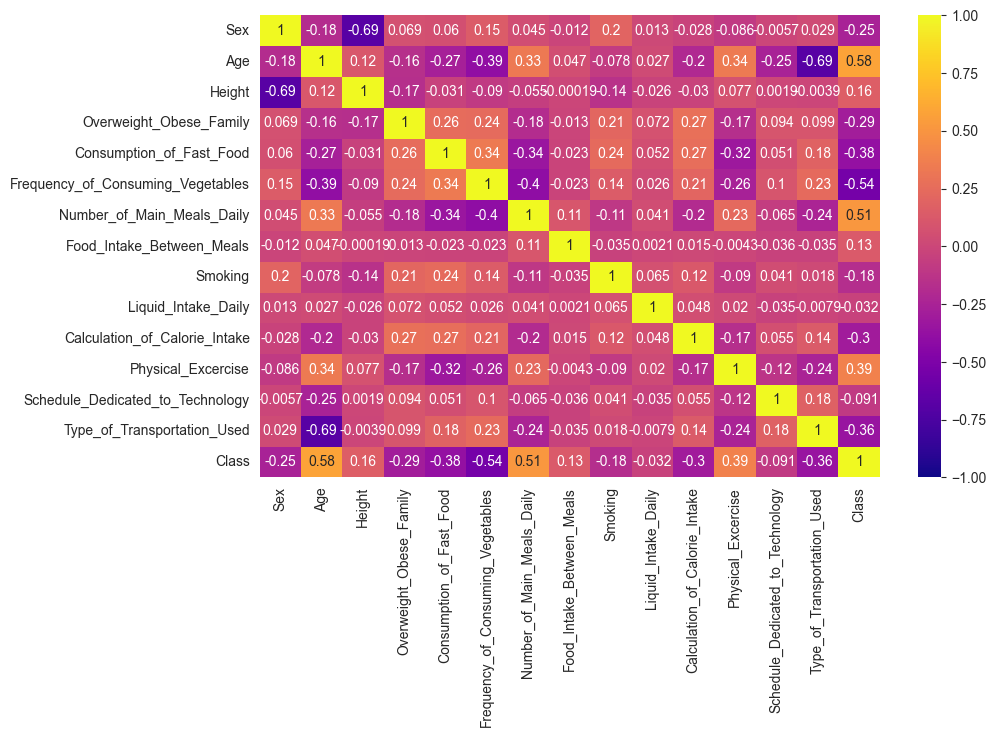

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt


def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i + 1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop


def get_top_correlations(df, n=5):
    au_corr = df.corr().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(key=abs, ascending=False)
    return au_corr[0:n]


def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr().abs()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname]


print(get_top_correlations(X, 10))

plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, cmap='plasma')

In [11]:
correlation(X, 0.6)

In [12]:
X.std() / X.mean()

Sex                                  0.318923
Age                                  0.296993
Overweight_Obese_Family              0.202472
Consumption_of_Fast_Food             0.257065
Frequency_of_Consuming_Vegetables    0.361568
Number_of_Main_Meals_Daily           0.340987
Food_Intake_Between_Meals            0.421806
Smoking                              0.271953
Liquid_Intake_Daily                  0.386357
Calculation_of_Calorie_Intake        0.209798
Physical_Excercise                   0.411237
Schedule_Dedicated_to_Technology     0.346810
dtype: float64

In [13]:
X.nunique()

Sex                                   2
Age                                  37
Overweight_Obese_Family               2
Consumption_of_Fast_Food              2
Frequency_of_Consuming_Vegetables     3
Number_of_Main_Meals_Daily            3
Food_Intake_Between_Meals             4
Smoking                               2
Liquid_Intake_Daily                   3
Calculation_of_Calorie_Intake         2
Physical_Excercise                    5
Schedule_Dedicated_to_Technology      3
dtype: int64

In [14]:
y.value_counts().sort_index()

# Underweight (73)
# Normal (658)
# Overweight (592)
# Obesity (287)

Class
1     73
2    658
3    592
4    287
Name: count, dtype: int64

<Figure size 1000x600 with 0 Axes>

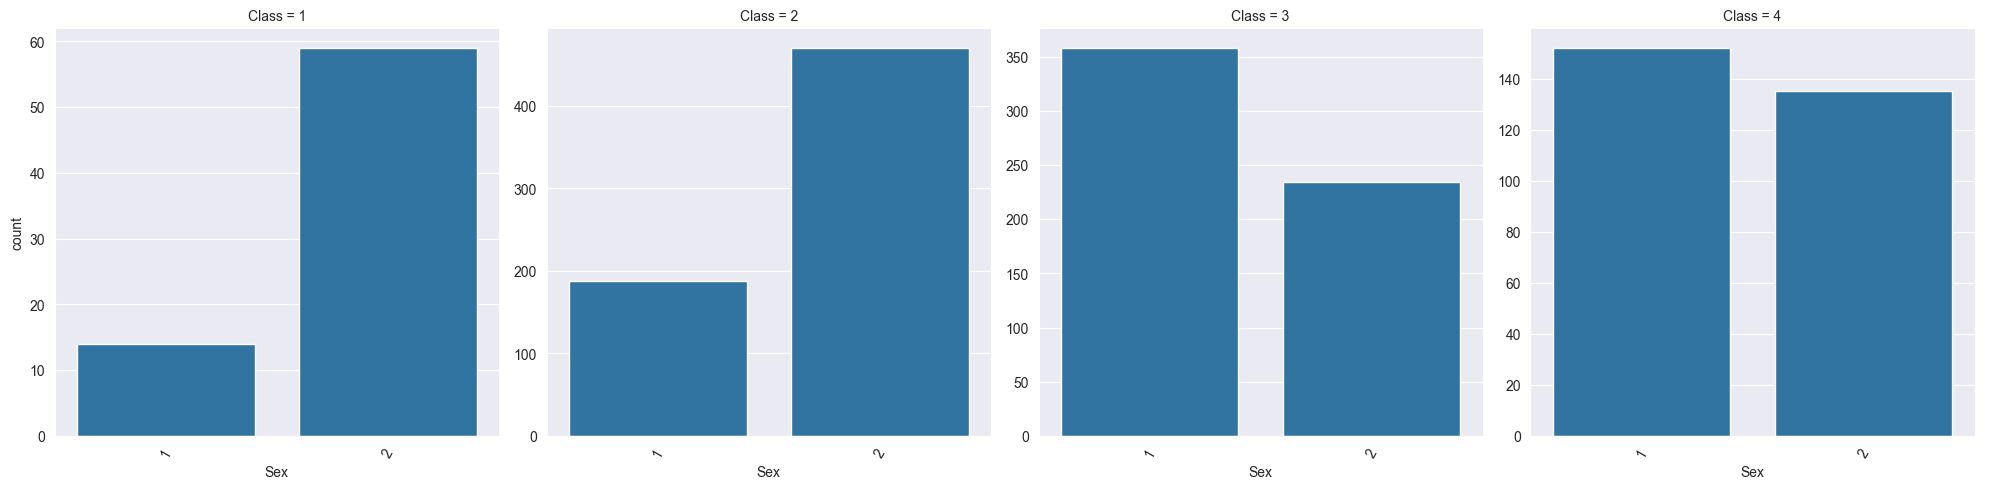

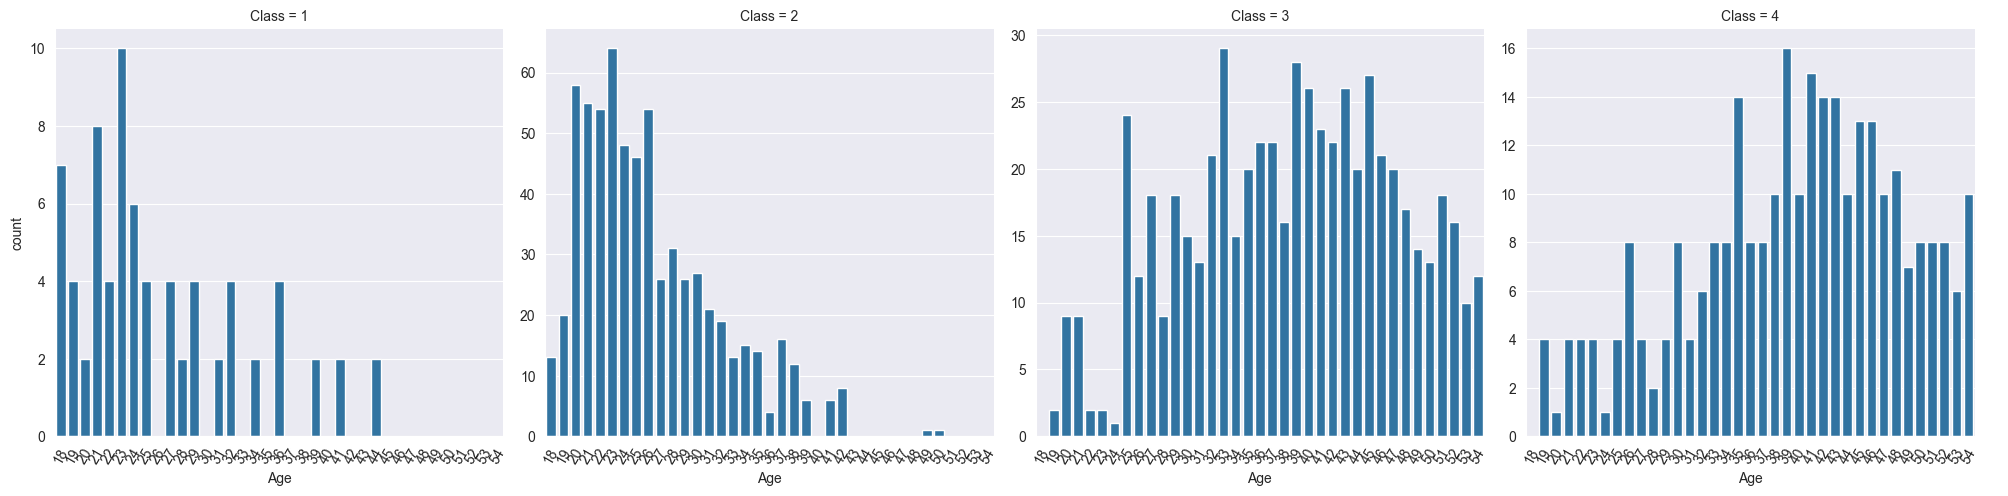

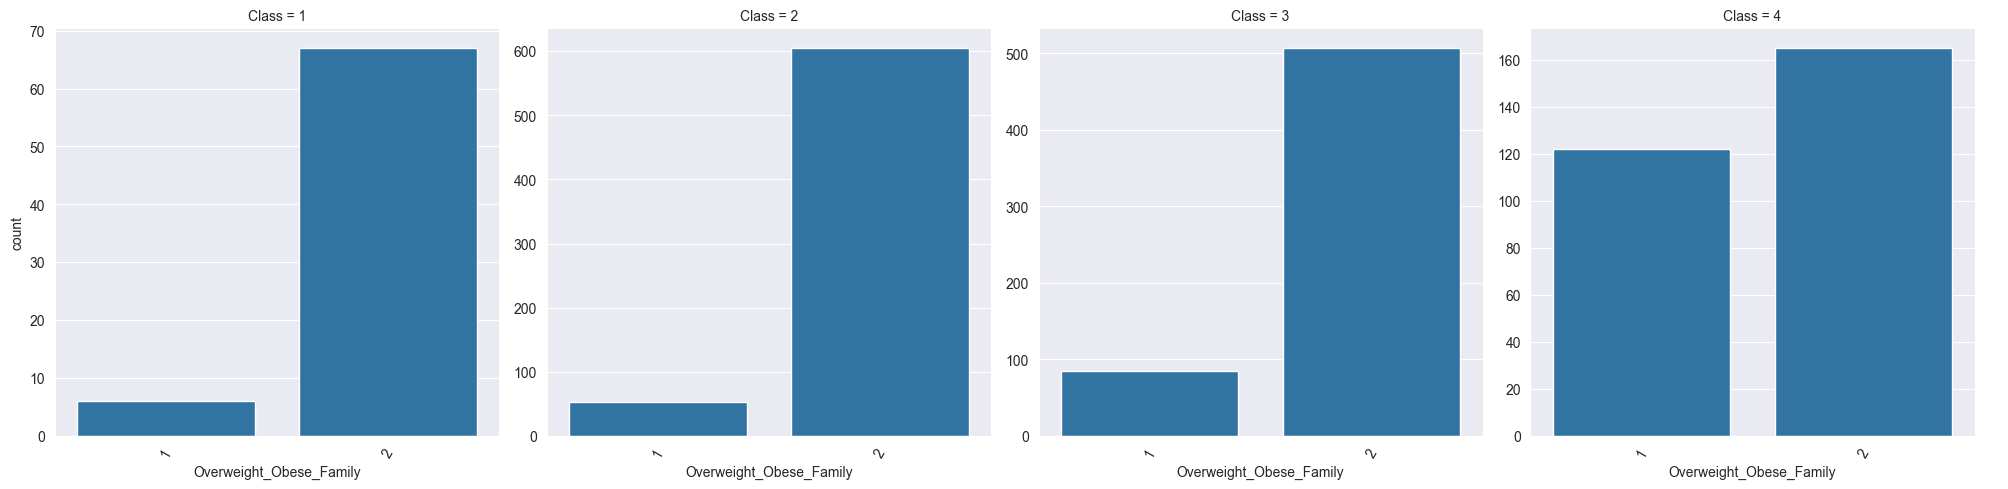

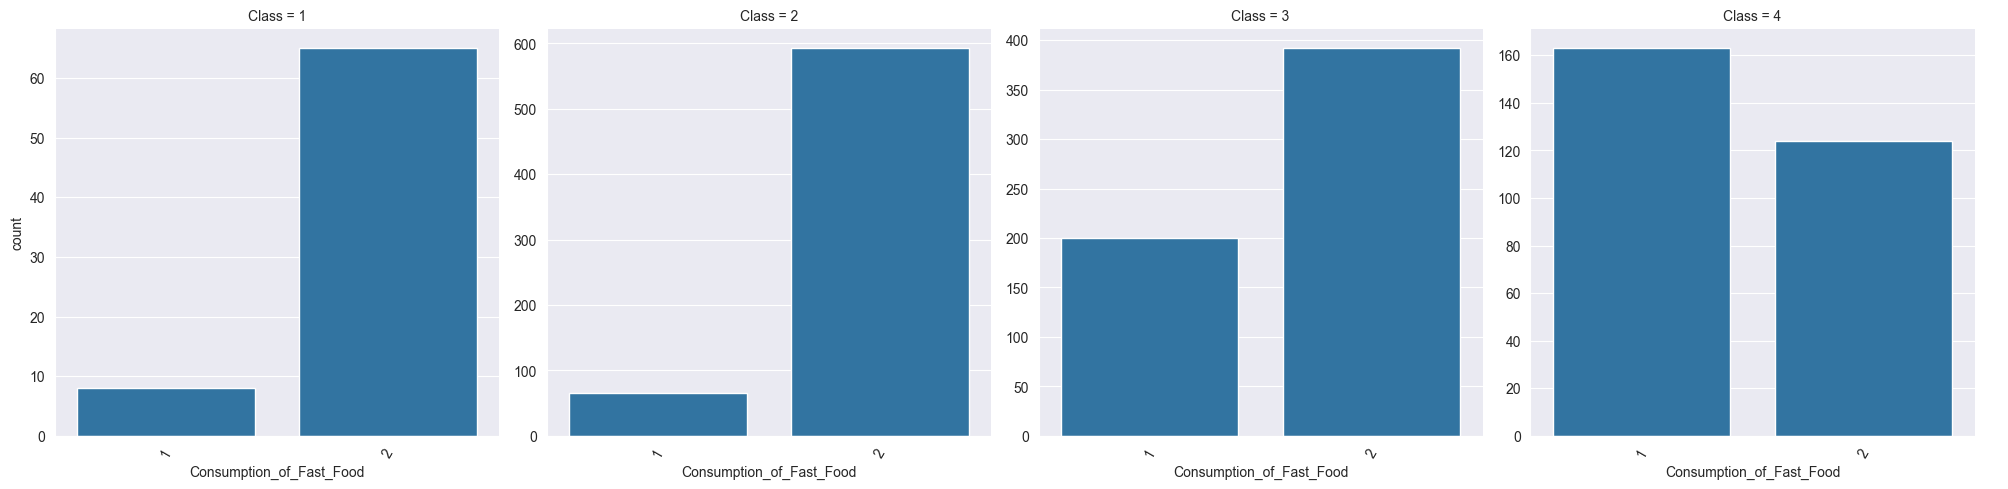

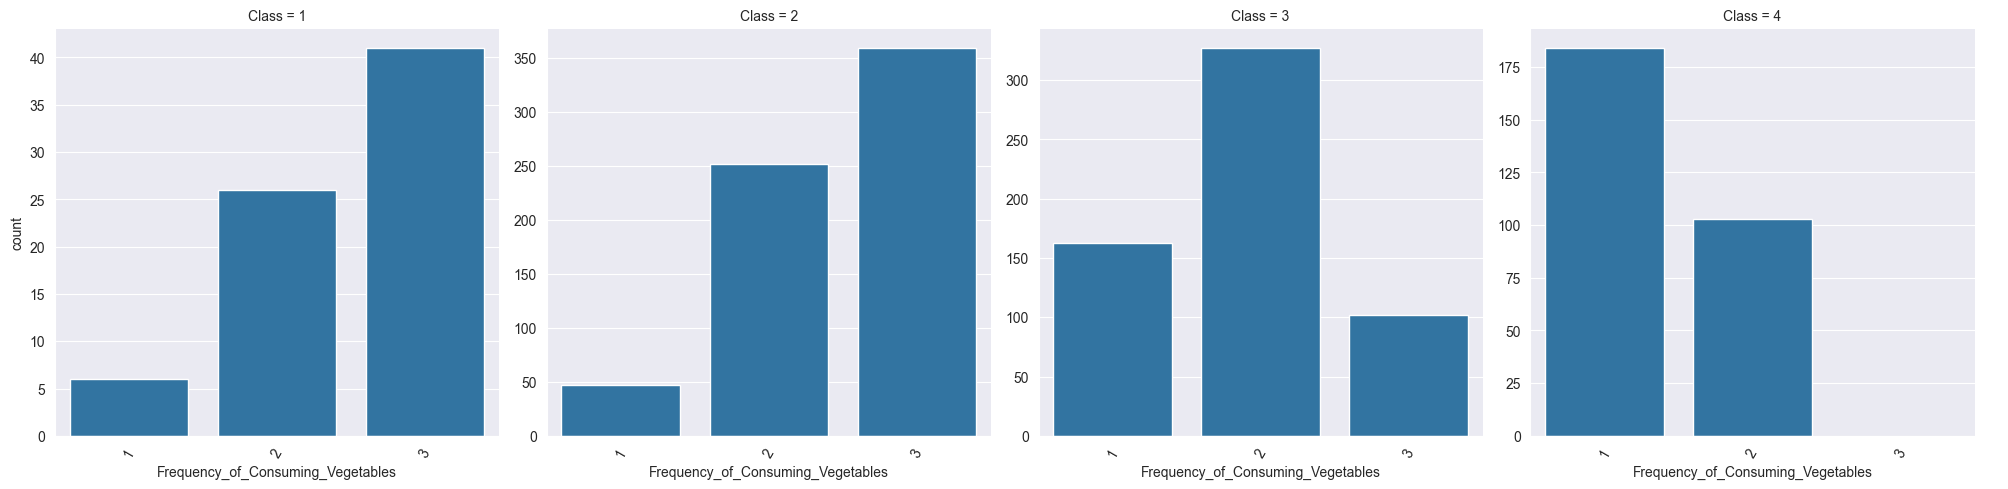

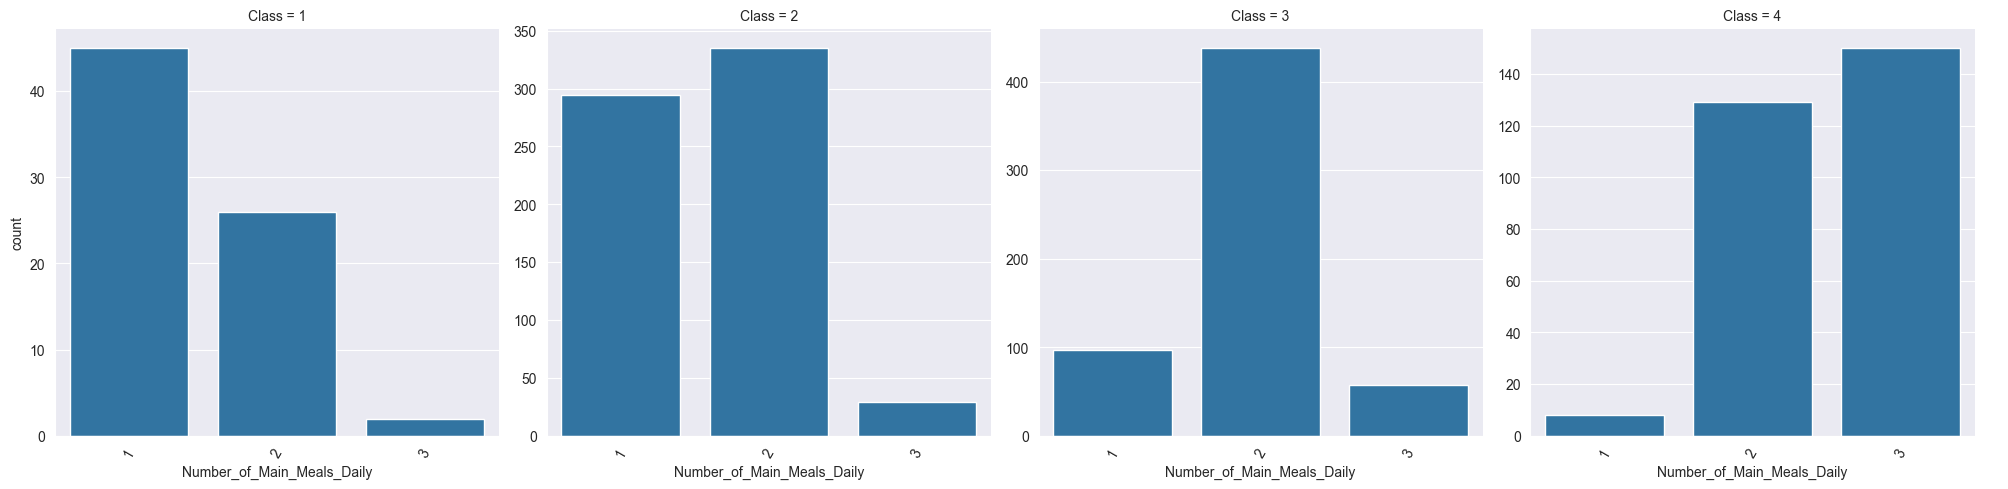

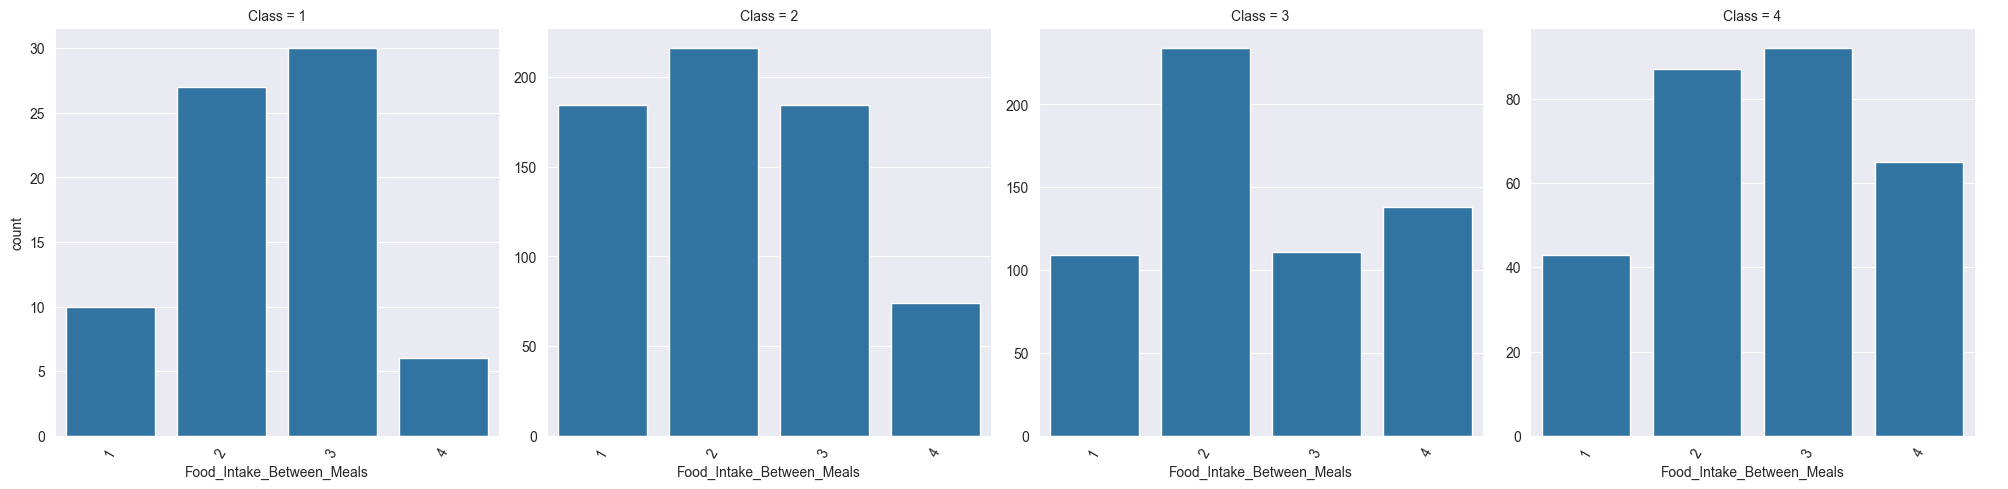

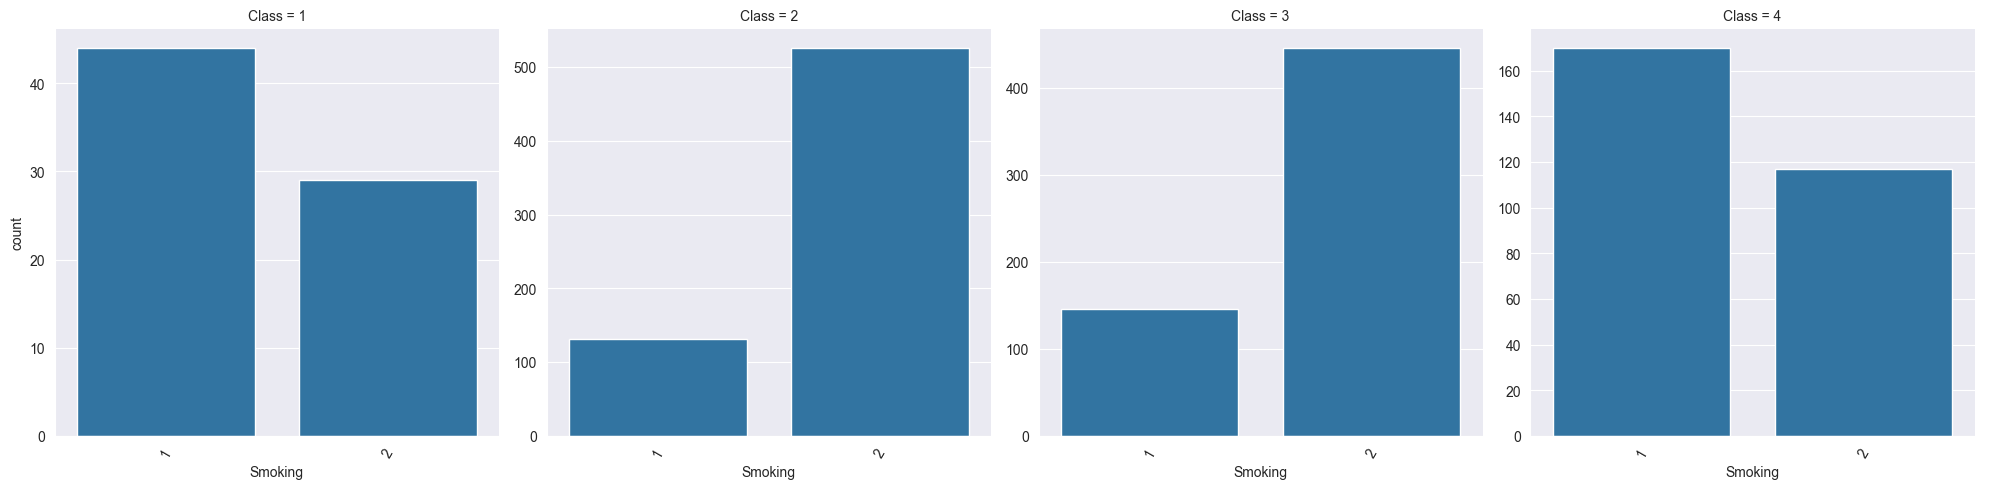

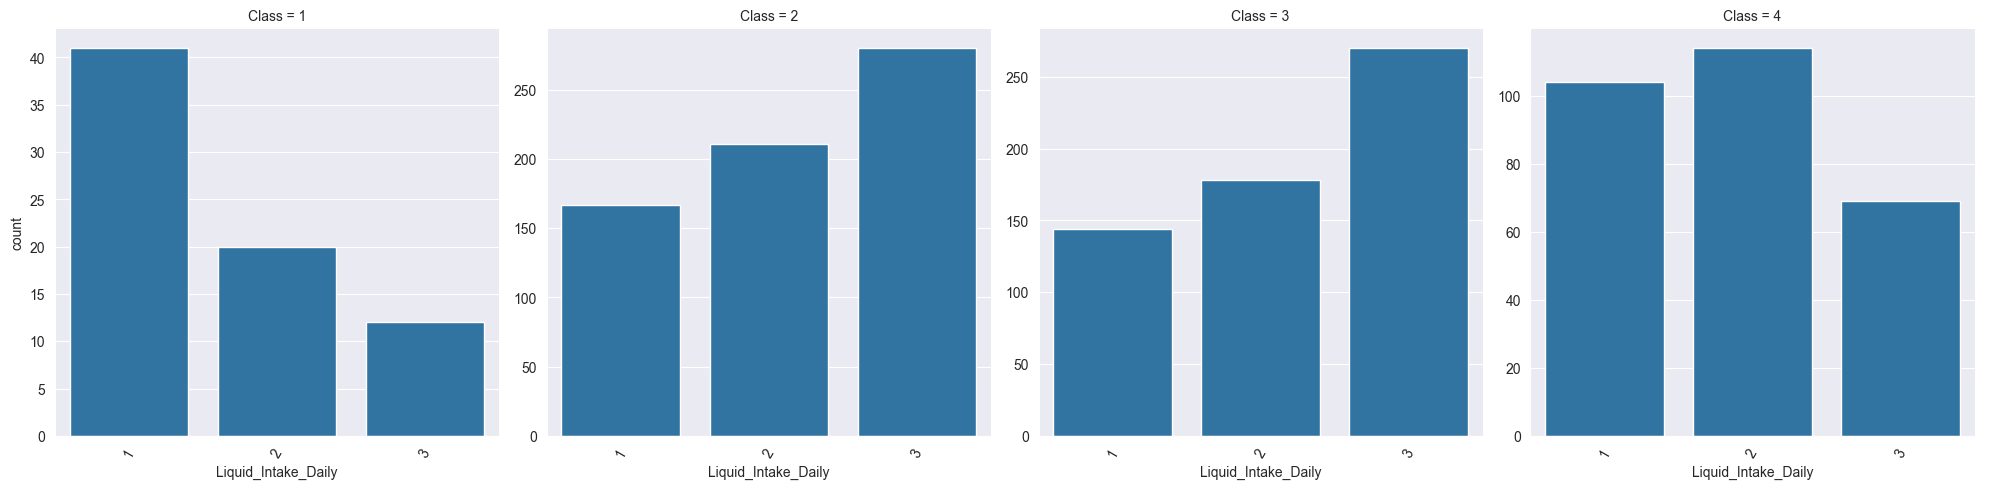

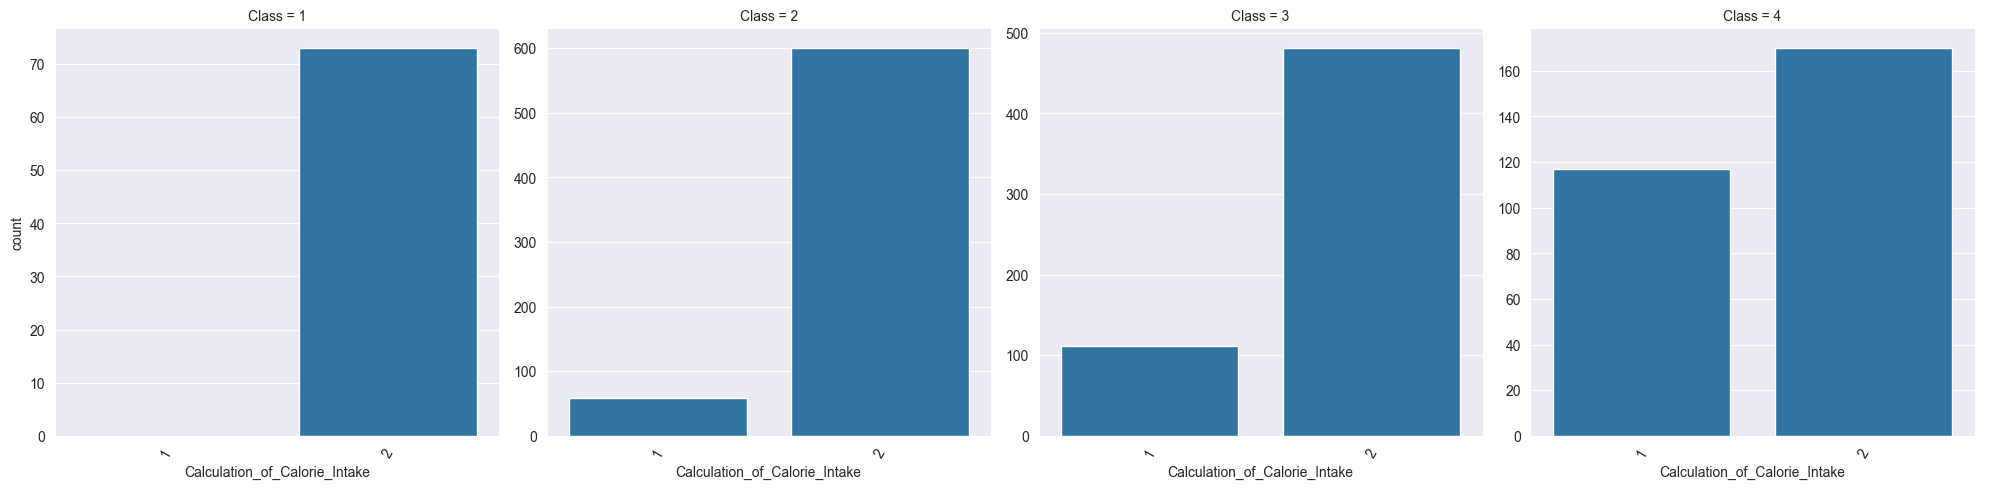

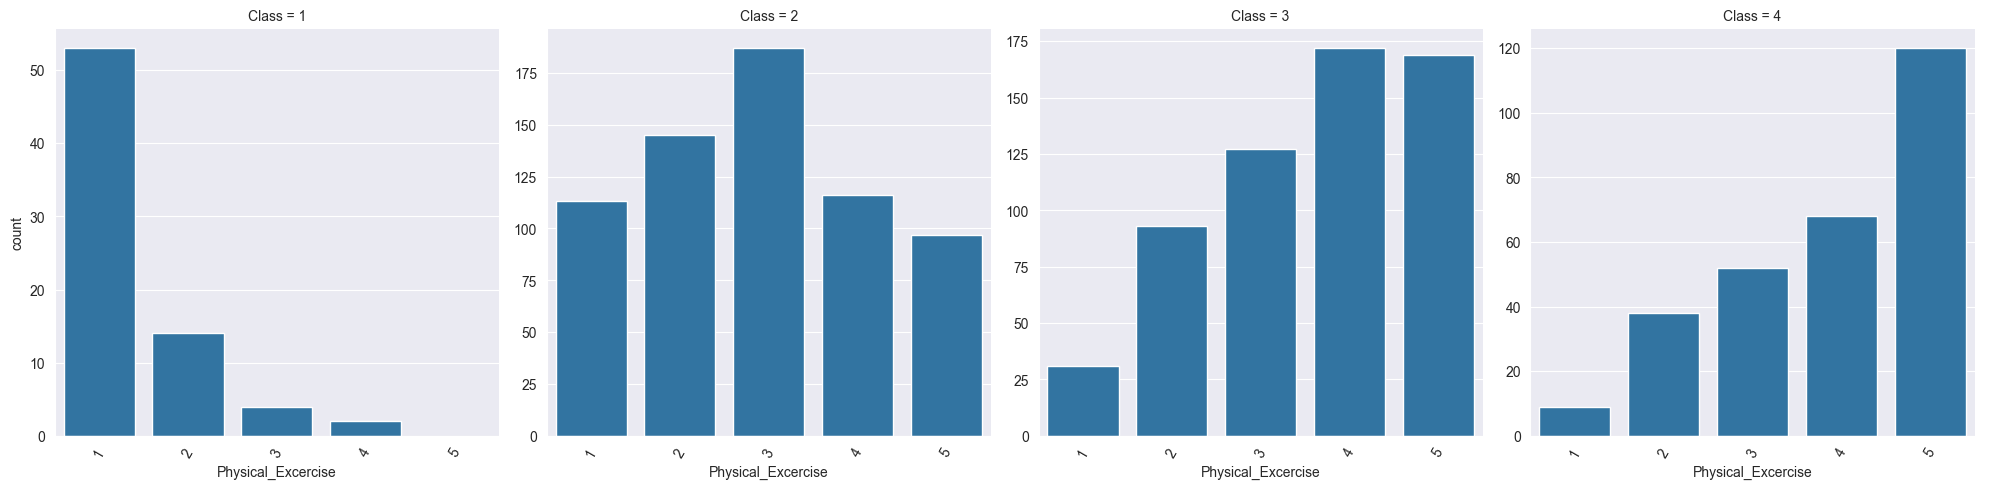

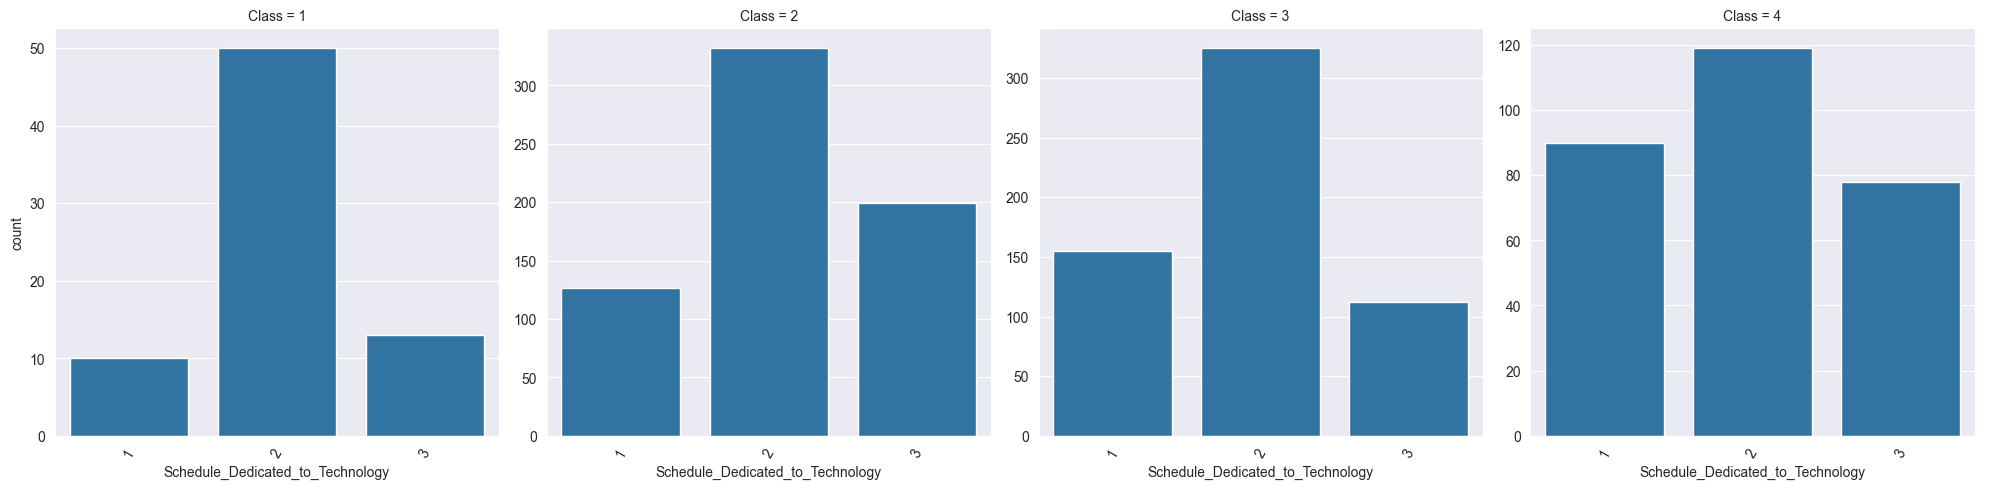

In [15]:
plt.figure(figsize=(10, 6))
for col in X.columns:
    g = sns.catplot(x=col, kind='count', col=y, data=X, sharey=False)
    g.set_xticklabels(rotation=60)

<Axes: xlabel='tsne1', ylabel='tsne2'>

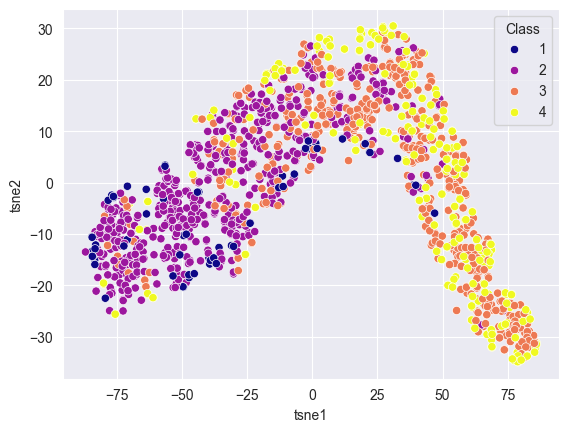

In [16]:
from sklearn.manifold import TSNE

### Your code is here

X_tsne = pd.DataFrame(TSNE(n_components=2).fit_transform(X), columns=['tsne1', 'tsne2'])
sns.scatterplot(x=X_tsne.tsne1, y=X_tsne.tsne2, hue=y, palette='plasma')

In [22]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

cols_for_ohe = [x for x in X.columns if X[x].nunique() <= 5]
cols_for_mte = [x for x in X.columns if X[x].nunique() > 5]

cols_for_ohe_idx = [list(X.columns).index(col) for col in cols_for_ohe]
cols_for_mte_idx = [list(X.columns).index(col) for col in cols_for_mte]

t = [('OneHotEncoder', OneHotEncoder(drop='first'), cols_for_ohe_idx),
     ('StandardScaler', StandardScaler(), cols_for_mte_idx)]

col_transform = ColumnTransformer(transformers=t)

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [26]:
from sklearn.pipeline import Pipeline
from catboost import CatBoostClassifier

pipe = Pipeline(steps=[('col_transformer', col_transform),
                       ('catboost', CatBoostClassifier())])
pipe.fit(X_train, y_train)

Learning rate set to 0.080155
0:	learn: 1.3034410	total: 142ms	remaining: 2m 21s
1:	learn: 1.2319364	total: 146ms	remaining: 1m 12s
2:	learn: 1.1779842	total: 150ms	remaining: 49.9s
3:	learn: 1.1218573	total: 154ms	remaining: 38.4s
4:	learn: 1.0809048	total: 158ms	remaining: 31.4s
5:	learn: 1.0447345	total: 162ms	remaining: 26.8s
6:	learn: 1.0181203	total: 166ms	remaining: 23.5s
7:	learn: 0.9895587	total: 170ms	remaining: 21.1s
8:	learn: 0.9624541	total: 174ms	remaining: 19.2s
9:	learn: 0.9394801	total: 178ms	remaining: 17.6s
10:	learn: 0.9148738	total: 182ms	remaining: 16.3s
11:	learn: 0.8955559	total: 186ms	remaining: 15.3s
12:	learn: 0.8731767	total: 190ms	remaining: 14.4s
13:	learn: 0.8575694	total: 194ms	remaining: 13.6s
14:	learn: 0.8380196	total: 197ms	remaining: 12.9s
15:	learn: 0.8250334	total: 201ms	remaining: 12.3s
16:	learn: 0.8056215	total: 204ms	remaining: 11.8s
17:	learn: 0.7907235	total: 223ms	remaining: 12.2s
18:	learn: 0.7757433	total: 227ms	remaining: 11.7s
19:	learn

Pipeline(steps=[('col_transformer',
                 ColumnTransformer(transformers=[('OneHotEncoder',
                                                  OneHotEncoder(drop='first'),
                                                  [0, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11]),
                                                 ('StandardScaler',
                                                  StandardScaler(), [1])])),
                ('catboost',
                 <catboost.core.CatBoostClassifier object at 0x00000201AF38F970>)])

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           1       0.80      0.36      0.50        11
           2       0.84      0.84      0.84       134
           3       0.77      0.84      0.80       121
           4       0.76      0.70      0.73        56

    accuracy                           0.80       322
   macro avg       0.79      0.68      0.72       322
weighted avg       0.80      0.80      0.79       322



In [37]:
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV
pipe_ovo = Pipeline(steps=[('col_transformer', col_transform),
                       ('ovo', OneVsOneClassifier(estimator=None))])
gs_ovo = GridSearchCV(estimator=pipe_ovo, param_grid={'ovo__estimator': [LogisticRegression(), SVC()]})

pipe_ovr = Pipeline(steps=[('col_transformer', col_transform),
                       ('ovr', OneVsRestClassifier(estimator=None))])
gs_ovr = GridSearchCV(estimator=pipe_ovr, param_grid={'ovr__estimator': [LogisticRegression(), SVC()]})

gs_ovo.fit(X_train, y_train)
gs_ovr.fit(X_train, y_train)

print('OneVsRestClassifier\n',classification_report(y_test, gs_ovr.predict(X_test)))
print('OneVsOneClassifier\n',classification_report(y_test, gs_ovo.predict(X_test)))

OneVsRestClassifier
               precision    recall  f1-score   support

           1       1.00      0.18      0.31        11
           2       0.80      0.81      0.80       134
           3       0.73      0.79      0.76       121
           4       0.75      0.68      0.71        56

    accuracy                           0.76       322
   macro avg       0.82      0.62      0.65       322
weighted avg       0.77      0.76      0.75       322

OneVsOneClassifier
               precision    recall  f1-score   support

           1       0.75      0.27      0.40        11
           2       0.80      0.80      0.80       134
           3       0.71      0.79      0.75       121
           4       0.72      0.64      0.68        56

    accuracy                           0.75       322
   macro avg       0.75      0.63      0.66       322
weighted avg       0.75      0.75      0.75       322



In [40]:
gs_ovo.best_params_, gs_ovr.best_params_

({'ovo__estimator': SVC()}, {'ovr__estimator': SVC()})

In [28]:
from sklearn.metrics import PrecisionRecallDisplay, precision_recall_curve 

precision, recall, thresholds = precision_recall_curve(y_test, pipe.predict_proba(X_test)[:, 1])

PrecisionRecallDisplay.from_estimator(estimator=pipe, X=X_test, y=y_test)

ValueError: multiclass format is not supported

In [29]:
from sklearn.metrics import RocCurveDisplay, roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, pipe.predict_proba(X_test)[:, 1])

RocCurveDisplay.from_estimator(estimator=pipe, X=X_test, y=y_test)
print(roc_auc_score(y_test, pipe.predict_proba(X_test)[:, 1]).__round__(3))

ValueError: multiclass format is not supported